<a href="https://colab.research.google.com/github/souzajvp/teaching-python/blob/main/Aulas_exploratorias/Aula01/Explora%C3%A7%C3%A3o_TB_PR(02_07).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

Lendo os dados de TB no PR do meu GitHub

In [2]:
url = 'https://raw.githubusercontent.com/souzajvp/teaching-python/main/dataset/tb_pr_sinan.csv'

In [3]:
dados = pd.read_csv(url)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Visualizando as colunas e primeiras linhas do banco de dados

In [4]:
dados.head()

,NU_NOTIFIC,TP_NOT,ID_AGRAVO,DT_NOTIFIC,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_DIAG,DT_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,CS_ZONA,ID_PAIS,NDUPLIC_N,IN_VINCULA,DT_DIGITA,DT_TRANSUS,DT_TRANSDM,DT_TRANSSM,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,IDENT_MICR,MIGRADO_W,ID_OCUPA_N,TRATAMENTO,INSTITUCIO,RAIOX_TORA,TESTE_TUBE,FORMA,EXTRAPU1_N,EXTRAPU2_N,EXTRAPUL_O,...,ETIONAMIDA,OUTRAS,OUTRAS_DES,TRAT_SUPER,NU_CONTATO,DOENCA_TRA,SG_UF_AT,ID_MUNIC_A,NU_NOTI_AT,DT_NOTI_AT,SG_UF_2,ID_MUNIC_2,BACILOSC_1,BACILOSC_2,BACILOSC_3,BACILOSC_4,BACILOSC_5,BACILOSC_6,TRATSUP_AT,DT_MUDANCA,NU_COMU_EX,SITUA_9_M,SITUA_12_M,SITUA_ENCE,DT_ENCERRA,TPUNINOT,POP_LIBER,POP_RUA,POP_SAUDE,POP_IMIG,BENEF_GOV,AGRAVDROGA,AGRAVTABAC,TEST_MOLEC,TEST_SENSI,ANT_RETRO,BAC_APOS_6,TRANSF,UF_TRANSF,MUN_TRANSF
0,233072,2,A169,20010104,2001,41,410420.0,1356.0,20010104,19611202.0,4039.0,F,9.0,NaN,3.0,41.0,410420.0,1356.0,1.0,1.0,0.0,0.0,18991230.0,18991230.0,18991230.0,20071210.0,NaN,18991230.0,20080815.0,NaN,1.0,NaN,1.0,NaN,1.0,4.0,1.0,NaN,NaN,NaN,...,2.0,2.0,NaN,9.0,NaN,NaN,41.0,410420.0,233072.0,20010104.0,41.0,410420.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN,1.0,20010703.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,233073,2,A169,20010220,2001,41,410690.0,1356.0,20010220,19740505.0,4026.0,F,9.0,NaN,3.0,41.0,410420.0,1356.0,1.0,1.0,0.0,0.0,18991230.0,18991230.0,18991230.0,20071210.0,NaN,18991230.0,20080815.0,NaN,1.0,NaN,1.0,NaN,1.0,4.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,NaN,NaN,41.0,410690.0,233073.0,20010220.0,41.0,410420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18991230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,668320,2,A169,20010107,2001,41,411950.0,1356.0,20010107,19550529.0,4045.0,I,6.0,NaN,0.0,41.0,411950.0,1356.0,1.0,1.0,0.0,0.0,18991230.0,18991230.0,18991230.0,20071214.0,NaN,18991230.0,20080815.0,NaN,1.0,NaN,3.0,NaN,1.0,4.0,1.0,NaN,NaN,NaN,...,2.0,2.0,NaN,9.0,NaN,NaN,41.0,411950.0,668320.0,20010107.0,41.0,411950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,20020103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,223888,2,A169,20010117,2001,41,411950.0,1356.0,20010117,19661128.0,4034.0,F,9.0,NaN,3.0,41.0,412770.0,1356.0,1.0,1.0,1.0,0.0,18991230.0,18991230.0,18991230.0,20080107.0,NaN,18991230.0,20080815.0,NaN,1.0,NaN,1.0,NaN,2.0,4.0,1.0,NaN,NaN,NaN,...,2.0,NaN,NaN,9.0,NaN,NaN,41.0,411950.0,223888.0,20010117.0,41.0,411950.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,20010718.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,766013,2,A169,20010216,2001,41,410690.0,1356.0,20010216,19600312.0,4040.0,M,6.0,1.0,3.0,41.0,410690.0,1356.0,1.0,1.0,0.0,0.0,18991230.0,18991230.0,20080125.0,18991230.0,NaN,18991230.0,20080806.0,NaN,1.0,NaN,3.0,1.0,1.0,4.0,1.0,NaN,NaN,NaN,...,2.0,2.0,NaN,9.0,0.0,2.0,41.0,410690.0,766013.0,20010216.0,41.0,410690.0,NaN,3.0,NaN,2.0,NaN,2.0,2.0,NaN,0.0,1.0,NaN,1.0,20010928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Para observar apenas os nomes das colunas, podemos usar o método `.columns`.

In [5]:
dados.columns

Index(['NU_NOTIFIC', 'TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'NU_ANO',
       'SG_UF_NOT', 'ID_MUNICIP', 'ID_REGIONA', 'DT_DIAG', 'DT_NASC',
       'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF',
       'ID_MN_RESI', 'ID_RG_RESI', 'CS_ZONA', 'ID_PAIS', 'NDUPLIC_N',
       'IN_VINCULA', 'DT_DIGITA', 'DT_TRANSUS', 'DT_TRANSDM', 'DT_TRANSSM',
       'DT_TRANSRM', 'DT_TRANSRS', 'DT_TRANSSE', 'IDENT_MICR', 'MIGRADO_W',
       'ID_OCUPA_N', 'TRATAMENTO', 'INSTITUCIO', 'RAIOX_TORA', 'TESTE_TUBE',
       'FORMA', 'EXTRAPU1_N', 'EXTRAPU2_N', 'EXTRAPUL_O', 'AGRAVAIDS',
       'AGRAVALCOO', 'AGRAVDIABE', 'AGRAVDOENC', 'AGRAVOUTRA', 'AGRAVOUTDE',
       'BACILOSC_E', 'BACILOS_E2', 'BACILOSC_O', 'CULTURA_ES', 'CULTURA_OU',
       'HIV', 'HISTOPATOL', 'DT_INIC_TR', 'RIFAMPICIN', 'ISONIAZIDA',
       'ETAMBUTOL', 'ESTREPTOMI', 'PIRAZINAMI', 'ETIONAMIDA', 'OUTRAS',
       'OUTRAS_DES', 'TRAT_SUPER', 'NU_CONTATO', 'DOENCA_TRA', 'SG_UF_AT',
       'ID_MUNIC_A', 'NU_NOTI_AT', 'DT_NO

Como o número de colunas é grande, podemos fatiar as colunas exibidas e analisar de 20 em 20, por exemplo.

Se vocês perceberem, o método `.columns` retorna algo parecido com uma lista (fechado por colchetes). Desta forma, basta usarmos os métodos para selecionar intervalos que vimos em outras aulas.

Abaixo, vamos exibir somente as primeiras 20 colunas.

In [6]:
dados.columns[0:20]

Index(['NU_NOTIFIC', 'TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'NU_ANO',
       'SG_UF_NOT', 'ID_MUNICIP', 'ID_REGIONA', 'DT_DIAG', 'DT_NASC',
       'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF',
       'ID_MN_RESI', 'ID_RG_RESI', 'CS_ZONA', 'ID_PAIS'],
      dtype='object')

<font color='red'>**-->** </font>Execute o Desafio 01, ao final do notebook.

Outra forma de analisarmos o formato (ou conteúdo) de um banco de dados, é usando o método `.shape`.


In [7]:
dados.shape

(57431, 99)

O método `.shape` retorna uma tupla. Basicamente algo nesse formato (a, b).

* a = número de linhas no nosso banco;
* b = número de colunas no nosso banco.

Para deixar mais claro, podemos até criar um print para nos mostrar essas informações.

In [8]:
print("No nosso banco, temos", dados.shape[0], "linhas")
print("No nosso banco, temos", dados.shape[1], "colunas")

No nosso banco, temos 57431 linhas
No nosso banco, temos 99 colunas


### Trabalhando com dados a nível de município
1. `ID_MN_RESI` - Código do município de residência;
2. `ID_MUNICIP` - Código do município de notificação.

Como nosso objetivo hoje é trabalhar com os casos de TB por cidade do PR, podemos usar o método groupby para agrupar os casos por município de residência.

In [9]:
dados_mun = dados.groupby('ID_MN_RESI').count().reset_index()

In [10]:
dados_mun.head()

,ID_MN_RESI,NU_NOTIFIC,TP_NOT,ID_AGRAVO,DT_NOTIFIC,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_DIAG,DT_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_RG_RESI,CS_ZONA,ID_PAIS,NDUPLIC_N,IN_VINCULA,DT_DIGITA,DT_TRANSUS,DT_TRANSDM,DT_TRANSSM,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,IDENT_MICR,MIGRADO_W,ID_OCUPA_N,TRATAMENTO,INSTITUCIO,RAIOX_TORA,TESTE_TUBE,FORMA,EXTRAPU1_N,EXTRAPU2_N,EXTRAPUL_O,...,ETIONAMIDA,OUTRAS,OUTRAS_DES,TRAT_SUPER,NU_CONTATO,DOENCA_TRA,SG_UF_AT,ID_MUNIC_A,NU_NOTI_AT,DT_NOTI_AT,SG_UF_2,ID_MUNIC_2,BACILOSC_1,BACILOSC_2,BACILOSC_3,BACILOSC_4,BACILOSC_5,BACILOSC_6,TRATSUP_AT,DT_MUDANCA,NU_COMU_EX,SITUA_9_M,SITUA_12_M,SITUA_ENCE,DT_ENCERRA,TPUNINOT,POP_LIBER,POP_RUA,POP_SAUDE,POP_IMIG,BENEF_GOV,AGRAVDROGA,AGRAVTABAC,TEST_MOLEC,TEST_SENSI,ANT_RETRO,BAC_APOS_6,TRANSF,UF_TRANSF,MUN_TRANSF
0,330250.0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0
1,330455.0,6,6,6,6,6,6,6,0,6,6,6,6,6,6,6,6,0,6,6,0,0,6,0,0,0,0,0,5,5,0,0,6,0,6,0,6,0,0,0,...,0,0,0,0,6,0,6,6,6,6,6,6,4,3,1,3,1,3,6,0,6,0,0,6,6,5,6,6,6,6,6,6,6,6,6,0,1,0,1,0
2,410000.0,8,8,8,8,8,8,8,8,8,8,8,8,8,3,8,8,6,5,8,7,7,8,6,6,7,0,6,7,2,6,0,8,1,8,6,8,0,0,0,...,7,7,0,7,2,2,8,8,8,8,8,8,2,6,1,5,1,5,1,0,0,7,0,8,8,2,1,1,1,1,1,1,1,1,0,0,0,0,0,0
3,410010.0,10,10,10,10,10,10,10,10,10,10,10,10,10,9,10,10,10,10,10,1,3,10,1,2,9,0,1,4,9,1,2,10,4,10,5,10,1,0,0,...,5,5,0,5,9,3,10,10,10,10,10,10,9,8,7,8,7,8,9,0,10,5,0,10,10,9,5,5,5,5,5,5,5,5,1,0,5,0,0,0
4,410020.0,43,43,43,43,43,43,43,43,43,43,43,43,43,42,36,43,43,43,43,17,17,30,7,4,35,0,3,25,31,16,3,43,25,42,40,43,1,0,0,...,39,34,3,41,28,39,43,43,43,43,43,43,6,13,4,12,4,10,27,3,12,27,0,41,42,31,1,1,1,1,1,1,1,1,0,0,0,0,0,0


Como usamos apenas o método `.groupby('ID_MN_RESI').count()`, todos os valores das outras colunas serão repetidos.

De forma resumida, o que fizemos foi contar quantas vezes o município '410020' aparece nas linhas do nosso banco.

In [11]:
dados_mun.shape

(402, 99)

<font color='red'>**-->** </font>Execute o Desafio 02, ao final do notebook.

O PR tem 399 municípios. Ainda assim, obtivemos 402 linhas após agruparmos por `ID_MN_RESI`. Os casos extras, provavelmente são de pessoas que moram em outros estados e foram atentidos no PR.

Isso pode ter sido um erro de digitação, uma vez que ao criar o banco de dados, eu especifiquei que queria apenas casos em que o indivíduo fosse residente no PR.

### População dos municípios
Para melhorar nossa análise, podemos adicionar os valores poulacionais que extraímos do Censo de 2010, lá do Tabnet.

In [12]:
url_pr = 'https://raw.githubusercontent.com/souzajvp/teaching-python/main/pop_parana_2010.csv'

In [13]:
pop_pr = pd.read_csv(url_pr)

In [14]:
pop_pr.head()

,POP_2010,ID_MUN_RES,MUNICIPIO
0,7764,410010,Abatiá
1,6376,410020,Adrianópolis
2,8270,410030,Agudos do Sul
3,103204,410040,Almirante Tamandaré
4,4306,410045,Altamira do Paraná


Nesse banco, temos as seguintes colunas
1. `POP_2010` - População dos municípios do PR em 2010;
2. `ID_MUN_RES` - Código do IBGE dos municípios do PR;
3. `MUNICIPIO` - Nome dos municípios do PR.

### Junção dos casos por município com a população
No nosso banco de TB (dados e dados_mun), temos apenas o código do IBGE para cada município. Apesar de útil, esse número dificulta a interpretação dos resultados.

Para melhorar nossa interpretação, podemos fundir os dados de população do PR no nosso banco.

Primeiro, vamos olhar a coluna que contém os códigos de município do nosso banco de TB

Neste caso, a coluna que tem essa informação é `ID_MN_RESI`

In [15]:
dados_mun.head(1)

,ID_MN_RESI,NU_NOTIFIC,TP_NOT,ID_AGRAVO,DT_NOTIFIC,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_DIAG,DT_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_RG_RESI,CS_ZONA,ID_PAIS,NDUPLIC_N,IN_VINCULA,DT_DIGITA,DT_TRANSUS,DT_TRANSDM,DT_TRANSSM,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,IDENT_MICR,MIGRADO_W,ID_OCUPA_N,TRATAMENTO,INSTITUCIO,RAIOX_TORA,TESTE_TUBE,FORMA,EXTRAPU1_N,EXTRAPU2_N,EXTRAPUL_O,...,ETIONAMIDA,OUTRAS,OUTRAS_DES,TRAT_SUPER,NU_CONTATO,DOENCA_TRA,SG_UF_AT,ID_MUNIC_A,NU_NOTI_AT,DT_NOTI_AT,SG_UF_2,ID_MUNIC_2,BACILOSC_1,BACILOSC_2,BACILOSC_3,BACILOSC_4,BACILOSC_5,BACILOSC_6,TRATSUP_AT,DT_MUDANCA,NU_COMU_EX,SITUA_9_M,SITUA_12_M,SITUA_ENCE,DT_ENCERRA,TPUNINOT,POP_LIBER,POP_RUA,POP_SAUDE,POP_IMIG,BENEF_GOV,AGRAVDROGA,AGRAVTABAC,TEST_MOLEC,TEST_SENSI,ANT_RETRO,BAC_APOS_6,TRANSF,UF_TRANSF,MUN_TRANSF
0,330250.0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0


Já no nosso banco de população, a coluna que contém o código de IBGE é `ID_MUN_RES`

In [16]:
pop_pr.head(1)

,POP_2010,ID_MUN_RES,MUNICIPIO
0,7764,410010,Abatiá


Assim, notamos que temos duas colunas com nomes diferentes, porém similares:
1. `ID_MN_RESI` - Banco de TB;
2. `ID_MUN_RES` - Banco de população do PR.
***
Finalmente, para fazermos a junção dos bancos, vamos usar o método `pd.merge()`

Para realizar o **merge**, precisamos especificar (nessa ordem):
1. nome do banco TB;
2. nome do banco de população;
3. `left_on=` :coluna do banco de TB que tem os códigos IBGE;
4.` right_on=` : coluna do banco de população que tem os códigos do IBGE;
***
Desta forma, teríamos a seguinte formatação:

`pd.merge(dados_mun, pop_pr, left_on='ID_MN_RESI', right_on='ID_MUN_RES')`

Utilizando a notação acima, vamos criar o novo banco (contendo os casos por município e a população).

In [17]:
dados_mun_pop = pd.merge(dados_mun, pop_pr, left_on='ID_MN_RESI', right_on='ID_MUN_RES')

In [18]:
dados_mun_pop.head()

,ID_MN_RESI,NU_NOTIFIC,TP_NOT,ID_AGRAVO,DT_NOTIFIC,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_DIAG,DT_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_RG_RESI,CS_ZONA,ID_PAIS,NDUPLIC_N,IN_VINCULA,DT_DIGITA,DT_TRANSUS,DT_TRANSDM,DT_TRANSSM,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,IDENT_MICR,MIGRADO_W,ID_OCUPA_N,TRATAMENTO,INSTITUCIO,RAIOX_TORA,TESTE_TUBE,FORMA,EXTRAPU1_N,EXTRAPU2_N,EXTRAPUL_O,...,TRAT_SUPER,NU_CONTATO,DOENCA_TRA,SG_UF_AT,ID_MUNIC_A,NU_NOTI_AT,DT_NOTI_AT,SG_UF_2,ID_MUNIC_2,BACILOSC_1,BACILOSC_2,BACILOSC_3,BACILOSC_4,BACILOSC_5,BACILOSC_6,TRATSUP_AT,DT_MUDANCA,NU_COMU_EX,SITUA_9_M,SITUA_12_M,SITUA_ENCE,DT_ENCERRA,TPUNINOT,POP_LIBER,POP_RUA,POP_SAUDE,POP_IMIG,BENEF_GOV,AGRAVDROGA,AGRAVTABAC,TEST_MOLEC,TEST_SENSI,ANT_RETRO,BAC_APOS_6,TRANSF,UF_TRANSF,MUN_TRANSF,POP_2010,ID_MUN_RES,MUNICIPIO
0,410010.0,10,10,10,10,10,10,10,10,10,10,10,10,10,9,10,10,10,10,10,1,3,10,1,2,9,0,1,4,9,1,2,10,4,10,5,10,1,0,0,...,5,9,3,10,10,10,10,10,10,9,8,7,8,7,8,9,0,10,5,0,10,10,9,5,5,5,5,5,5,5,5,1,0,5,0,0,0,7764,410010,Abatiá
1,410020.0,43,43,43,43,43,43,43,43,43,43,43,43,43,42,36,43,43,43,43,17,17,30,7,4,35,0,3,25,31,16,3,43,25,42,40,43,1,0,0,...,41,28,39,43,43,43,43,43,43,6,13,4,12,4,10,27,3,12,27,0,41,42,31,1,1,1,1,1,1,1,1,0,0,0,0,0,0,6376,410020,Adrianópolis
2,410030.0,18,18,18,18,18,18,18,18,18,18,18,18,18,17,9,18,18,18,18,3,4,17,3,0,15,0,0,7,17,1,7,18,7,17,7,18,2,0,0,...,7,18,7,18,18,18,18,18,18,17,16,14,14,13,13,16,0,16,7,0,17,17,17,11,11,11,11,10,11,11,9,6,1,5,0,0,0,8270,410030,Agudos do Sul
3,410040.0,685,685,685,685,685,685,685,685,685,683,685,685,685,578,660,685,685,678,685,274,354,609,241,260,486,0,173,347,444,250,76,684,280,678,506,684,127,12,9,...,519,446,406,684,684,684,684,683,680,390,566,363,537,348,513,442,190,444,364,7,655,665,453,168,168,168,168,168,169,169,165,91,33,76,19,19,19,103204,410040,Almirante Tamandaré
4,410045.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0,0,1,0,1,1,1,1,1,1,0,0,0,...,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4306,410045,Altamira do Paraná


Após fazer a junção das colunas, temos então 102 colunas, ao invés de 99.

Neste caso, o número excessivo de colunas está atrapalhando a visualização. Para melhorar a nossa análise, vamos selecionar apenas as colunas de interesse.

Isso pode ser feito chamando os `dados` e abrindo dois colchetes para especificar as colunas de interesse.

Desta forma: `dados[['coluna_a', 'coluna_b']]`

Criando os `dados_finais` contendo apenas as colunas de interesse

In [19]:
dados_finais = dados_mun_pop[['ID_MN_RESI', 'NU_NOTIFIC', 'POP_2010', 'MUNICIPIO']]

<font color='red'>**-->**</font> Execute o Desafio 03, ao final do notebook.

In [20]:
dados_finais.head()

,ID_MN_RESI,NU_NOTIFIC,POP_2010,MUNICIPIO
0,410010.0,10,7764,Abatiá
1,410020.0,43,6376,Adrianópolis
2,410030.0,18,8270,Agudos do Sul
3,410040.0,685,103204,Almirante Tamandaré
4,410045.0,1,4306,Altamira do Paraná


Agora podemos verificar quais cidades tem o maior número de casos. Isso pode ser feito usando o método `sort_values()`.

De forma geral, vamos organizar os `dados_finais` de acordo com o número de casos de TB reportados.

Isso pode ser feito da seguinte forma: `dados_finais.sort_values('NU_NOTIFIC', ascending=False)`

In [21]:
dados_finais.sort_values('NU_NOTIFIC', ascending=False)

,ID_MN_RESI,NU_NOTIFIC,POP_2010,MUNICIPIO
93,410690.0,10471,1751907,Curitiba
118,410830.0,3149,256088,Foz do Iguaçu
190,411370.0,3011,506701,Londrina
252,411820.0,2785,140469,Paranaguá
274,411990.0,1691,311611,Ponta Grossa
...,...,...,...,...
329,412395.0,3,3571,Santa Mônica
26,410220.0,2,3913,Atalaia
13,410115.0,2,2859,Ângulo
289,412085.0,1,3803,Quatro Pontes


Assim vemos que os 3 municípios com maior número de casos são Curitiba, Foz do Iguaçu e Londrina.

**Que tal fazermos um gráfico de barras com o número de casos para cada município?**

<font color='red'>**-->**</font> Execute o Desafio 04, ao final do notebook.

In [22]:
import matplotlib.pyplot as plt

<BarContainer object of 399 artists>

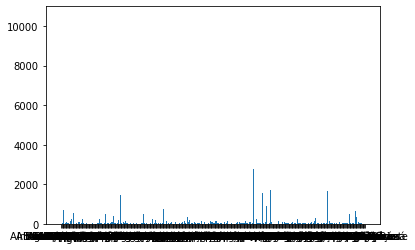

In [23]:
plt.bar(dados_finais['MUNICIPIO'], dados_finais['NU_NOTIFIC'])

Notamos algumas coisas de errado no nosso gráfico:
1. Plotar as 399 cidades ao mesmo tempo faz com que seja impossível discernir as barras e os nomes no eixo x;
2. Alguma coisa está acontencendo que está fazendo com que o eixo y esteja muito grande.

Uma possível solução seria plotarmos apenas as cidades que tem mais de 100 mil habitantes.

Para fazer isso, podemos usar o método `.query()` da seguinte forma:

In [24]:
dados_finais.query('POP_2010 >= 100000')

,ID_MN_RESI,NU_NOTIFIC,POP_2010,MUNICIPIO
3,410040.0,685,103204,Almirante Tamandaré
16,410140.0,536,120919,Apucarana
17,410150.0,452,104150,Arapongas
21,410180.0,633,119123,Araucária
58,410420.0,477,112377,Campo Largo
68,410480.0,1333,286205,Cascavel
78,410580.0,1464,212967,Colombo
93,410690.0,10471,1751907,Curitiba
118,410830.0,3149,256088,Foz do Iguaçu
134,410940.0,753,167328,Guarapuava


Podemos renomear esses dados_finais após filtragem para `dados_finais_filtrados` e aí sim plotar novamente o gráfico de barras.

In [25]:
dados_finais_filtrados = dados_finais.query('POP_2010 >= 100000')

<font color='red'>**-->**</font> Execute o Desafio 05, ao final do notebook.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text major ticklabel objects>)

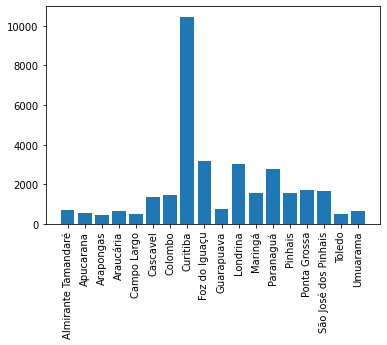

In [26]:
plt.bar(dados_finais_filtrados['MUNICIPIO'], dados_finais_filtrados['NU_NOTIFIC'])
# corrigindo a orientação das identificações do eixo x
plt.xticks(rotation=90)

Então, no gráfico acima vemos o número de casos de TB em municípios com mais de 100 mil habitantes no PR

<font color='red'>**-->**</font> Execute o Desafio 06, ao final do notebook.

Para finalizar nossa análise, vamos calcular o número de casos reportados considerando a população de cada local.

Para fazer isso, basta selecionarmos a coluna de casos e dividir pela coluna de população.

In [27]:
dados_finais['NU_NOTIFIC'] / dados_finais['POP_2010']

0      0.001288
1      0.006744
2      0.002177
3      0.006637
4      0.000232
         ...   
394    0.006862
395    0.001048
396    0.003797
397    0.002917
398    0.005655
Length: 399, dtype: float64

Assim, podemos criar uma nova coluna nos nossos `dados_finais` chamada `CASOS/HAB` para armazenar o resultado dessa equação.

In [28]:
dados_finais['CASOS/HAB'] = dados_finais['NU_NOTIFIC'] / dados_finais['POP_2010']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Em seguida, podemos multiplicar essa coluna por **100000** para ter o número de casos a cada 100 mil habitantes.

In [29]:
dados_finais['CASOS/HAB'] * 100000 

0      128.799588
1      674.404015
2      217.654172
3      663.733964
4       23.223409
          ...    
394    686.213350
395    104.766894
396    379.746835
397    291.724244
398    565.535595
Name: CASOS/HAB, Length: 399, dtype: float64

Podemos inserir esse resultado em uma nova variável, chamada `CASOS/HAB100`

In [30]:
dados_finais['CASOS/HAB100'] = dados_finais['CASOS/HAB'] * 100000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Agora, podemos usar o `sort_values()` para organizar de acordo com os casos a cada 100 mil habitantes.

In [31]:
dados_finais.sort_values('CASOS/HAB100', ascending=False).head(10)

,ID_MN_RESI,NU_NOTIFIC,POP_2010,MUNICIPIO,CASOS/HAB,CASOS/HAB100
252,411820.0,2785,140469,Paranaguá,0.019826,1982.643857
224,411620.0,261,15718,Morretes,0.016605,1660.516605
136,410960.0,510,32095,Guaratuba,0.015890,1589.032560
135,410950.0,122,7871,Guaraqueçaba,0.015500,1549.993648
330,412400.0,74,5249,Santana do Itararé,0.014098,1409.792341
111,410775.0,116,8293,Figueira,0.013988,1398.770047
215,411570.0,404,29428,Matinhos,0.013728,1372.842191
264,411915.0,1569,117008,Pinhais,0.013409,1340.933953
118,410830.0,3149,256088,Foz do Iguaçu,0.012297,1229.655431
275,411995.0,254,20920,Pontal do Paraná,0.012141,1214.149140


Com os resultados acima, vemos que municípios como Paranaguá, Pinhais e Foz do Iguaçu se destacam negativamente. 

Na verdade, precisamos ter cuidado ao intrepretar esses dados pois municípios com um número reduzido de habitantes tem seus valores de casos/100mil habitantes inflados. Isso acontece pois ao efetuar a conta, pequenos números de casos já causam um grande impacto devido ao baixo número de habitantes.

**Além de olhar para os números**, podemos criar um gráfico de população x número de casos para identificar municípios que se comportam de forma destacada.

In [32]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'População')

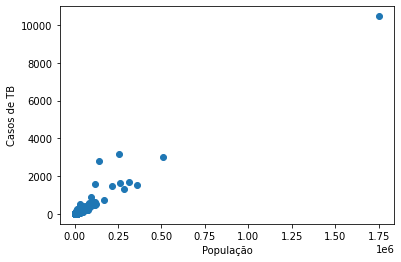

In [33]:
plt.scatter(dados_finais['POP_2010'], dados_finais['NU_NOTIFIC'])
plt.ylabel('Casos de TB')
plt.xlabel('População')

No gráfico acima, podemos entender que existe uma relação entre as duas variáveis. Em outras palavras, quanto maior a população, maior vai ser o número de casos de TB e vice-versa.

Até ai tudo bem, isso é o esperado de uma doença infectocontagiosa. O problema surge quando notamos um desbalanço nessa relação. Por exemplo, podemos notar 2 ou 3 pontos no gráfico que estão mais a cima do que os outros.

Provavelmente, esses municípios estão tendo problemas para controlar a TB.

Para visualizar melhor essa relação, podemos remover Curitiba do banco, já que o município tem um número de habitantes muito maior que os outros.

In [34]:
finais_sem = dados_finais.query('MUNICIPIO != "Curitiba"')

Com a operação acima, usei o método `.query()` para selecionar apenas municípios que tivessem nomes difererentes de Curitiba.

Text(0.5, 0, 'População')

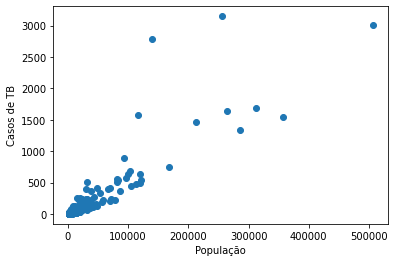

In [35]:
plt.scatter(finais_sem['POP_2010'], finais_sem['NU_NOTIFIC'])
plt.ylabel('Casos de TB')
plt.xlabel('População')

Agora fica mais fácil ver como os 2 ou 3 pontos mais acima e a esquerda se destacam dos demais.

# Desafios

<font color='red'>Desafio 01.</font> Selecione as 10 primeiras e, em seguida, as 10 últimas colunas usando o método dados.columns

<font color='red'>**Desafio 02.** </font> Use o método `print()` para dizer quantas linhas e quantas colunas estão presentes no conjunto de dados `dados_mun`.

<font color='red'>**Desafio 03.** </font> Selecione apenas as colunas `DT_NOTIFIC,NU_ANO,SG_UF_NOT,ID_MUNICIP` do conjunto de dados `dados`. Em seguida, crie um novo conjunto chamado `dados_novos` contendo apenas essas 4 colunas.

<font color='red'>**Desafio 04.** </font> Organize o conjunto de dados `dados_mun` de acordo com a população de cada município, de forma crescente.

<font color='red'>**Desafio 05.** </font> Use o método `.query()` para selecionar apenas municípios que tem **mais de 1000** casos de TB reportados a partir dos `dados_finais`. Em seguida, crie um novo conjunto de dados chamado `top_tb`.

**Atenção**: No exemplo que fizemos em aula, filtramos municípios de acordo com a população e não de acordo com os casos de TB

<font color='red'>**Desafio 06.** </font> Faça um gráfico de barras com o **nome dos municípios no eixo x** e **o número de habitantes no eixo y**, considerando o conjunto de dados criado no Desafio 05.

<font color='red'>**Desafio 07.** </font> Qual seria um título adequado para o gráfico acima?

Repita o código utilizado para criar o gráfico e use o método `plt.title('Título do Gráfico')` para inserir o título pensado.